<a href="https://colab.research.google.com/github/AndresInsuasty/tesis-cafes-especiales/blob/main/utils/Crear_Imagenes_objetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para crear imagenes etiqueta
Objetivo: construir imagenes de segmentado a partir de las etiquetas de labelme convertidas a txt
¿porqué se convirtieron las etiquetas a txt? -> para facilitar la lectura de las coordenadas de la región a etiquetar o realizar mascara


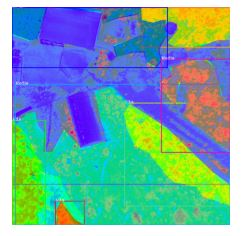

## Librerias

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from glob import glob
import time



## Variables de ambiente

In [ ]:
PATH_ETIQUETAS =  '/content/drive/MyDrive/segmentado/etiquetas_txt/' # path de etiquetas a leer
IMAGE_SIZE = 800 # Tamaño de la imagen a crear, es imagen cuadrada
COLOR_BAJA = (255,0,0)
COLOR_MEDIA = (0,255,0)
COLOR_ALTA = (0,0,255)

## Creando imagen base

In [ ]:
def crear_imgbase(IMAGE_SIZE=800):
    return np.zeros((IMAGE_SIZE,IMAGE_SIZE,3),np.uint8)

# Crear imagen de salida

In [ ]:
coordenadas = np.array([[263.47863247863256,540.0256410256411],
                [277.1538461538462,575.9230769230769],
                [278.008547008547,596.4358974358975],
                [301.0854700854701,608.4017094017095],
                [319.8888888888889,633.1880341880342],
                [333.56410256410265,655.4102564102565],
                [337.8376068376069,685.3247863247864],
                [328.43589743589746,715.2393162393163],
                [332.70940170940173,735.7521367521368],
                [358.35042735042737,745.1538461538462],
               [372.0256410256411,746.008547008547],
                [381.42735042735046,685.3247863247864]],
               np.int32)
coordenadas.shape

(12, 2)

In [ ]:
def crear_imgseg(coordenadas,color,img_base):
    #crear una imagen base
    pts = coordenadas.reshape((-1,1,2))
    salida = cv2.fillPoly(img_base, [pts], color)
    return salida

## Lectura de etiquetas en txt

In [ ]:
def lstxt(path, filtro="*.txt"):
    spath=path + filtro
    return glob(spath)  

In [ ]:
etiquetas = lstxt('/content/drive/MyDrive/segmentado/etiquetas_txt/')
prueba_etiqueta = etiquetas[0]
prueba_etiqueta

'/content/drive/MyDrive/segmentado/etiquetas_txt/0000.txt'

In [ ]:
def leer_etiqueta(txt):
    f = open (txt,'r')
    mensaje = f.read()
    f.close()
    return mensaje

In [ ]:
def union_seg(prueba_etiqueta):
    a = leer_etiqueta(prueba_etiqueta)
    regiones = a.split('\n')
    img_base = crear_imgbase()
    cont=0
    for r in regiones:
        if r!='':
            l_c = r.split(',')
            et = l_c[-1]
            l_c = l_c[:-1]
            lc = [float(i) for i in l_c]
            b = list(map(list, zip(lc[::2], lc[1::2])))
            b = np.array(b,np.int32)
            if et == 'Alta':
                cr = COLOR_ALTA
            elif et == 'Media':
                cr = COLOR_MEDIA
            elif et == 'Baja':
                cr = COLOR_BAJA
            else:
                cr=(100,100,100)
            crear_imgseg(b,cr,img_base)

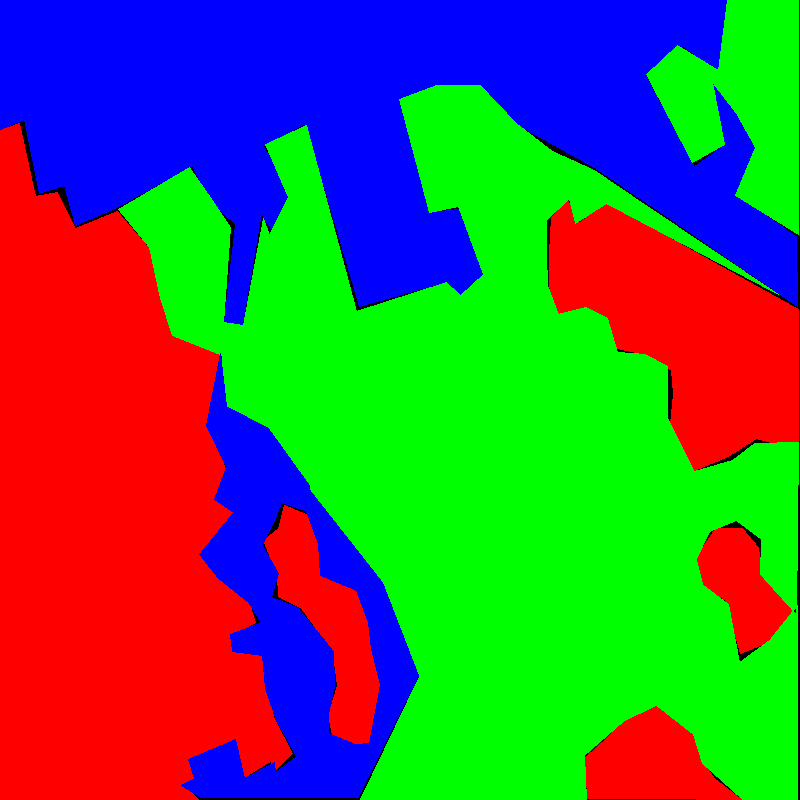

In [ ]:
cv2_imshow(img_base)

In [ ]:
img_base.shape

(800, 800, 3)